In [2]:
from utils.data_loader import DataLoader
dataloader = DataLoader("./combined_datasets", [("with_tumor", 1), ("without_tumor", 0)])
train, test, val = dataloader.get_dataframes()
print(train["class"].value_counts())
print(test["class"].value_counts())
print(val["class"].value_counts())
train_generator, test_generator, val_generator = dataloader.get_generators(train, test, val, batch_size=5, target_size=(224, 224))

class
without_tumor    2649
with_tumor       2649
Name: count, dtype: int64
class
without_tumor    331
with_tumor       331
Name: count, dtype: int64
class
without_tumor    331
with_tumor       331
Name: count, dtype: int64
Found 5298 validated image filenames belonging to 2 classes.
Found 662 validated image filenames belonging to 2 classes.
Found 662 validated image filenames belonging to 2 classes.


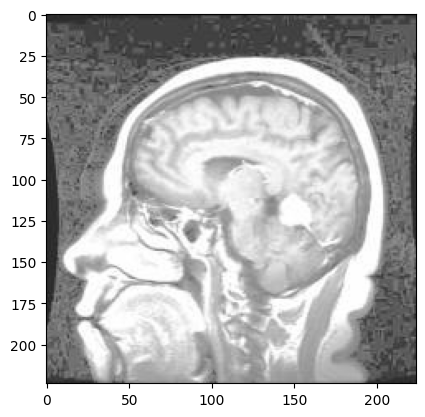

In [2]:
import matplotlib.pyplot as plt

# Get the next batch of images and labels
images, labels = next(train_generator)

# Get the first image from the batch
image = images[0]

# If the image is grayscale and has a channel dimension, remove it
if image.shape[-1] == 1:
    image = image.squeeze()

# Plot the image
plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Assuming that train_generator and validation_generator are defined
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[early_stopping])

# Assuming that test_generator is defined
_, accuracy = model.evaluate_generator(test_generator)
print('Test accuracy:', accuracy)

Epoch 1/100
1060/1060 [==============================] - 34s 29ms/step - loss: 4.5454 - accuracy: 0.7888 - val_loss: 1.3345 - val_accuracy: 0.8867
Epoch 2/100
1060/1060 [==============================] - 30s 28ms/step - loss: 1.7624 - accuracy: 0.9013 - val_loss: 0.7695 - val_accuracy: 0.9411
Epoch 3/100
1060/1060 [==============================] - 31s 29ms/step - loss: 1.0667 - accuracy: 0.9371 - val_loss: 1.6830 - val_accuracy: 0.8943
Epoch 4/100
1060/1060 [==============================] - 31s 29ms/step - loss: 0.6501 - accuracy: 0.9577 - val_loss: 0.6977 - val_accuracy: 0.9502
Epoch 5/100
1060/1060 [==============================] - 30s 29ms/step - loss: 0.5097 - accuracy: 0.9675 - val_loss: 0.6630 - val_accuracy: 0.9592
Epoch 6/100
1060/1060 [==============================] - 30s 29ms/step - loss: 0.4305 - accuracy: 0.9728 - val_loss: 0.5260 - val_accuracy: 0.9577
Epoch 7/100
1060/1060 [==============================] - 30s 28ms/step - loss: 0.5058 - accuracy: 0.9724 - val_loss: 0

/tmp/ipykernel_12831/1791402422.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, accuracy = model.evaluate_generator(test_generator)


Test accuracy: 0.9667673707008362


In [5]:
model.save("./models/cnn.h5")

/home/disuqi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from keras import models
from keras import layers
from keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2024-01-23 14:46:21.318070: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 14:46:21.343187: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 14:46:21.343231: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 14:46:21.348482: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 14:46:21.348535: I external/local_xla/xla/stream_executor